In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
!pip install ydata-profiling # Install the ydata_profiling package
from ydata_profiling import ProfileReport # Import ProfileReport from ydata_profiling
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

df = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']


In [ ]:
# prompt: train test split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S
...,...,...,...,...,...,...,...
534,3,female,30.0,0,0,8.6625,S
584,3,male,NaN,0,0,8.7125,C
493,1,male,71.0,0,0,49.5042,C
527,1,male,NaN,0,0,221.7792,S


In [ ]:
si_age = SimpleImputer(add_indicator=True)
si_embarked = SimpleImputer(strategy='most_frequent')

X_train_age = si_age.fit_transform(X_train[['Age']])
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])

X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])

In [ ]:
# prompt: function transform fare with log use functiontransformer

from sklearn.preprocessing import FunctionTransformer

# Assuming 'Fare' is a column in your DataFrame
def log_transform(x):
    return np.log1p(x)

transformer = FunctionTransformer(log_transform)

# Example usage:
X_train_fare = transformer.fit_transform(X_train[['Fare']])
X_test_fare = transformer.transform(X_test[['Fare']])

In [ ]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Age', 'Fare']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])

In [ ]:
ohe_sex = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)

X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked = ohe_embarked.transform(X_test_embarked)

In [ ]:
X_train['family'] = X_train['SibSp'] + X_train['Parch']
X_test['family'] = X_test['SibSp'] + X_test['Parch']

In [ ]:

X_train_rem = X_train.drop(columns=['Sex','Age','Embarked','SibSp','Parch','Fare'])
X_test_rem = X_test.drop(columns=['Sex','Age','Embarked','SibSp','Parch','Fare'])

In [ ]:
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked,X_train_fare),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked,X_test_fare),axis=1)



In [ ]:
X_train_transformed

array([[ 1.        ,  0.        , 40.        , ...,  0.        ,
         0.        ,  3.3576216 ],
       [ 3.        ,  2.        ,  4.        , ...,  0.        ,
         1.        ,  2.87356464],
       [ 3.        ,  0.        , 47.        , ...,  0.        ,
         1.        ,  2.30258509],
       ...,
       [ 1.        ,  0.        , 71.        , ...,  0.        ,
         0.        ,  3.9220565 ],
       [ 1.        ,  0.        , 29.78590426, ...,  0.        ,
         1.        ,  5.40618115],
       [ 1.        ,  0.        , 29.78590426, ...,  0.        ,
         1.        ,  3.29305522]])

In [ ]:
clf = LogisticRegression(max_iter = 10000)
clf.fit(X_train_transformed,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(max_depth =10,random_state = 1)
rf.fit(X_train_transformed,y_train)
y_pred = rf.predict(X_test_transformed)
accuracy_score(y_test,y_pred)

0.8100558659217877

In [ ]:
y_pred = clf.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7653631284916201

In [ ]:

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X_train_transformed, y_train, cv=10)

print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81944444 0.88888889 0.8028169  0.81690141 0.78873239 0.81690141
 0.83098592 0.78873239 0.76056338 0.83098592]
Average 5-Fold CV Score: 0.8144953051643192


In [ ]:

cv_scores = cross_val_score(rf, X_train_transformed, y_train, cv=10)

print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.79166667 0.90277778 0.78873239 0.85915493 0.87323944 0.77464789
 0.8028169  0.8028169  0.77464789 0.8028169 ]
Average 5-Fold CV Score: 0.8173317683881065


In [ ]:

bg_rf = BaggingClassifier(estimator=rf, n_estimators=100, random_state=42)
bg_rf.fit(X_train_transformed,y_train)
y_pred = rf.predict(X_test_transformed)
accuracy_score(y_test,y_pred)

0.8100558659217877

In [ ]:
# cv_scores = cross_val_score(bg_rf, X_train_transformed, y_train, cv=10)

# print(cv_scores)
# print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
PassengerId = test_df['PassengerId']
test_df = test_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

In [ ]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


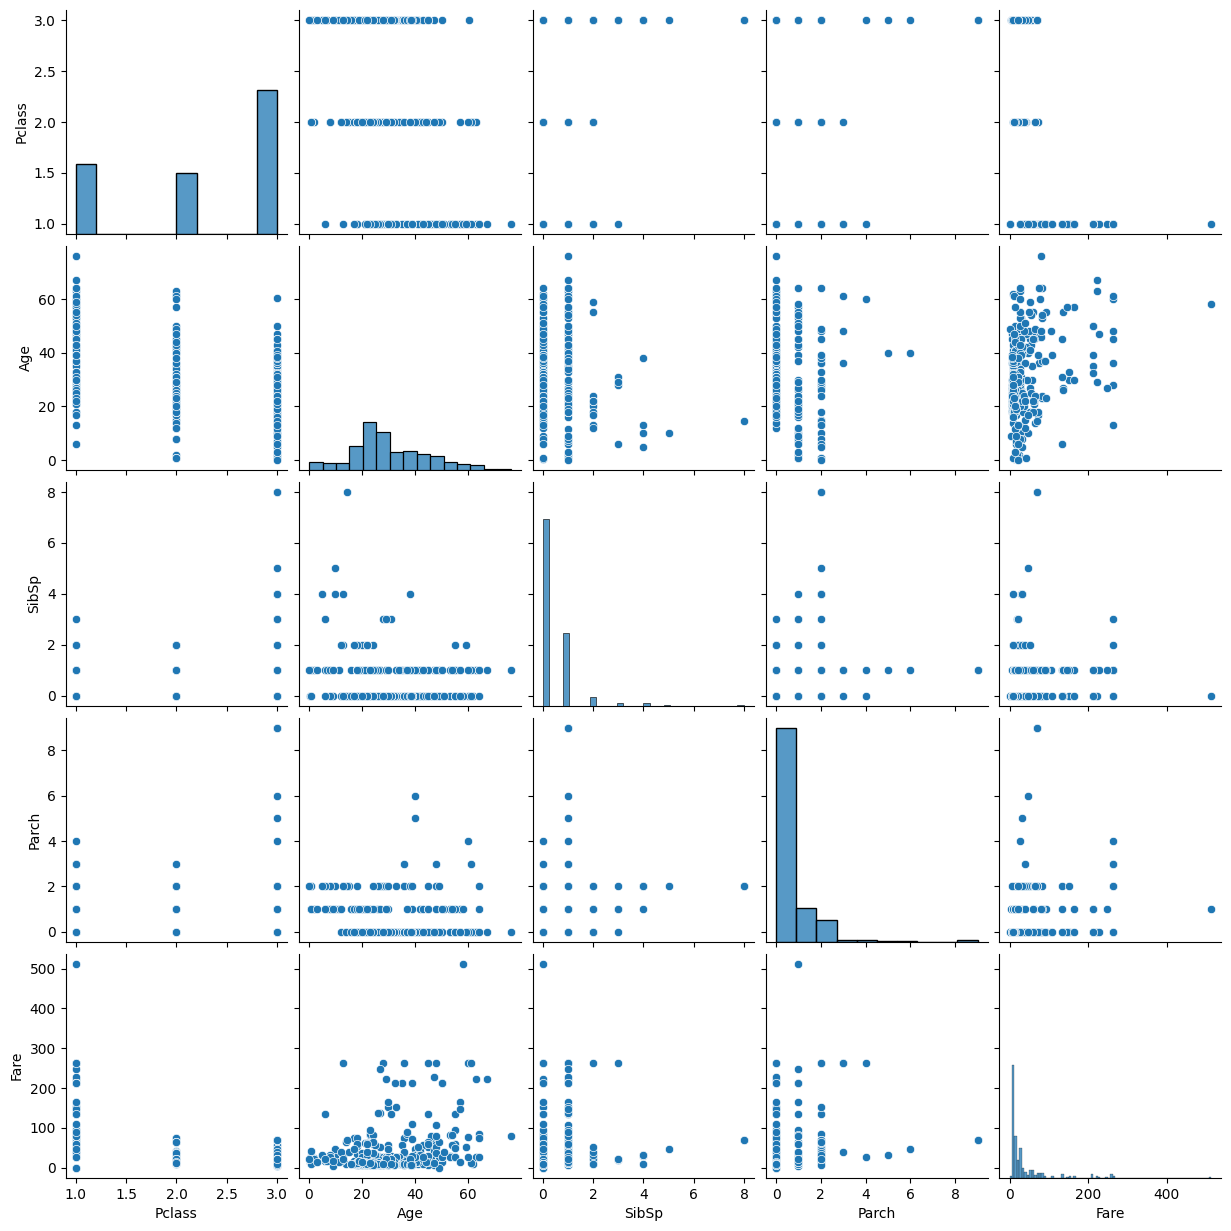

In [ ]:
sns.pairplot(test_df)

<Axes: ylabel='Fare'>

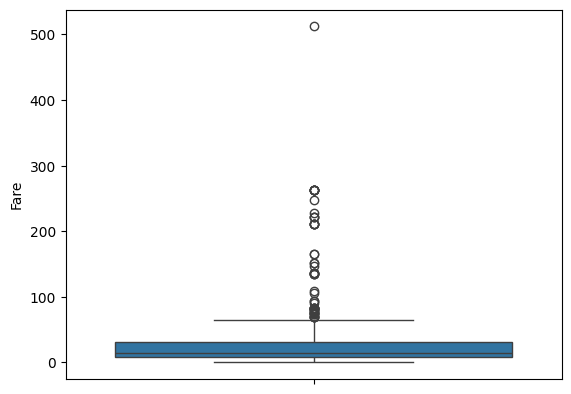

In [ ]:
sns.boxplot(test_df['Fare'])

In [ ]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
test_df_age = si_age.fit_transform(test_df[['Age']])

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)
test_df_fare = transformer.fit_transform(test_df[['Fare']])

test_df_embarked = si_embarked.fit_transform(test_df[['Embarked']])



<ipython-input-444-bc9a069c8ce4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)


In [ ]:
test_df_scaled = scaler.fit_transform(test_df[columns_to_scale])

In [ ]:

test_df_sex = ohe_sex.fit_transform(test_df[['Sex']])
test_df_embarked = ohe_embarked.fit_transform(test_df_embarked)

In [ ]:
test_df['family'] = test_df['SibSp'] + test_df['Parch']


In [ ]:
test_df_rem = test_df.drop(columns=['Sex','Age','Embarked','SibSp','Parch','Fare'])

In [ ]:
test_df_transformed = np.concatenate((test_df_rem,test_df_age,test_df_sex,test_df_embarked,test_df_fare),axis=1)

In [ ]:
y_pred_random = rf.predict(test_df_transformed)


In [ ]:
y_pred_random.shape

(418,)

In [ ]:
df_random = pd.DataFrame({'PassengerId': PassengerId.values, 'Survived': y_pred_random})

In [ ]:
df_random.to_csv('submission_random.csv', index=False)

In [ ]:
y_pred_logistic = clf.predict(test_df_transformed)


In [ ]:
df_logistic = pd.DataFrame({'PassengerId': PassengerId.values, 'Survived': y_pred_logistic})

In [ ]:
df_logistic.to_csv('submission_logistic.csv', index=False)

In [ ]:
y_pred_bg = bg_rf.predict(test_df_transformed)

In [ ]:
df_bg = pd.DataFrame({'PassengerId': PassengerId.values, 'Survived': y_pred_bg})

In [ ]:
df_bg.to_csv('submission_bg.csv', index=False)